In [1]:
import glob
import pandas as pd
import csv

merged_files = []
for file in glob.glob("bert-experiment/bert_experiment*.csv"):
    with open(file) as f:
        r = csv.DictReader(f)
        for row in r:
            merged_files.append(row)
            
df = pd.DataFrame(merged_files)
df[[col for col in df.columns if col not in {
"bert_layer",
"bert_mode",
"bert_trainable",
#"epoch"
#"best_epoch"
"linear_enriched",
"training_duration"
    }]] = df[[col for col in df.columns if col not in {
"bert_layer",
"bert_mode",
"bert_trainable",
"linear_enriched",
#"epoch"
#"best_epoch"
"training_duration"
    }]].astype(float)
df["label"] = [f"{m}({l}{'/Enriched' if e == 'True' else ''})".replace("BertPoolerClass.", "") for l, m,e  in zip(df["bert_layer"], df["bert_mode"], df["linear_enriched"])]

In [2]:
from IPython.core.display import display, HTML
display(HTML(df.sort_values("precision-positive").to_html())) 

,bert_layer,bert_mode,bert_trainable,epoch,best_epoch,training_duration,accuracy,precision,recall,fscore,precision-negative,precision-positive,recall-negative,recall-positive,fscore-negative,fscore-positive,loss,training_accuracy,training_precision,training_recall,training_fscore,training_precision-negative,training_precision-positive,training_recall-negative,training_recall-positive,training_fscore-negative,training_fscore-positive,training_loss,validation_accuracy,validation_precision,validation_recall,validation_fscore,validation_precision-negative,validation_precision-positive,validation_recall-negative,validation_recall-positive,validation_fscore-negative,validation_fscore-positive,validation_loss,linear_enriched,label
36,-1,BertPoolerClass.CLS,True,8.0,4.0,0:44:42.671886,0.908461,0.454230,0.500000,0.476018,0.908461,0.000000,1.000000,0.000000,0.952035,0.000000,0.306275,0.908267,0.454160,0.499072,0.475558,0.908319,0.000000,0.998145,0.000000,0.951116,0.000000,0.310971,0.908197,0.454098,0.500000,0.475945,0.908197,0.000000,1.000000,0.000000,0.951890,0.000000,0.310257,NaN,CLS(-1)
40,-1,BertPoolerClass.CLS,True,11.0,7.0,1:00:07.166466,0.908461,0.454230,0.500000,0.476018,0.908461,0.000000,1.000000,0.000000,0.952035,0.000000,0.306262,0.908267,0.454035,0.497091,0.474589,0.908071,0.000000,0.994183,0.000000,0.949178,0.000000,0.310229,0.908197,0.454098,0.500000,0.475945,0.908197,0.000000,1.000000,0.000000,0.951890,0.000000,0.308523,NaN,CLS(-1)
41,-1,BertPoolerClass.CLS,True,5.0,1.0,0:30:07.059596,0.908461,0.454230,0.500000,0.476018,0.908461,0.000000,1.000000,0.000000,0.952035,0.000000,0.307965,0.908267,0.454173,0.499975,0.475975,0.908345,0.000000,0.999950,0.000000,0.951949,0.000000,0.312066,0.908197,0.454098,0.500000,0.475945,0.908197,0.000000,1.000000,0.000000,0.951890,0.000000,0.314366,NaN,CLS(-1)
69,-1,BertPoolerClass.CLS,True,10.0,6.0,0:55:05.739783,0.908461,0.454230,0.500000,0.476018,0.908461,0.000000,1.000000,0.000000,0.952035,0.000000,0.306212,0.908267,0.454129,0.499950,0.475939,0.908259,0.000000,0.999900,0.000000,0.951878,0.000000,0.310456,0.908197,0.454098,0.500000,0.475945,0.908197,0.000000,1.000000,0.000000,0.951890,0.000000,0.307127,NaN,CLS(-1)
155,-1,BertPoolerClass.CLS,True,4.0,0.0,0:24:35.176165,0.908461,0.454230,0.500000,0.476018,0.908461,0.000000,1.000000,0.000000,0.952035,0.000000,0.307586,0.908267,0.454172,0.499473,0.475747,0.908345,0.000000,0.998947,0.000000,0.951494,0.000000,0.313219,0.908197,0.454098,0.500000,0.475945,0.908197,0.000000,1.000000,0.000000,0.951890,0.000000,0.309387,NaN,CLS(-1)
102,-2,BertPoolerClass.MAX,False,5.0,1.0,0:06:43.244731,0.916484,0.778230,0.599355,0.635972,0.925508,0.630952,0.987555,0.211155,0.955525,0.316418,0.195749,0.907629,0.709488,0.603577,0.632758,0.926360,0.492616,0.975277,0.231877,0.950189,0.315327,0.259713,0.919126,0.897345,0.567840,0.598208,0.919689,0.875000,0.996791,0.138889,0.956689,0.239726,0.189225,NaN,MAX(-2)
164,-1,BertPoolerClass.MEANMAX,False,5.0,1.0,0:06:51.213485,0.933260,0.799541,0.798467,0.799003,0.963082,0.636000,0.963468,0.633466,0.963275,0.634731,0.170711,0.928035,0.794952,0.732184,0.758707,0.949904,0.640000,0.971817,0.492552,0.960736,0.556678,0.199230,0.912204,0.750227,0.901725,0.800010,0.987868,0.512586,0.914561,0.888889,0.949802,0.650218,0.226160,NaN,MEANMAX(-1)
44,-2,BertPoolerClass.MAX,False,8.0,4.0,0:10:08.082610,0.919767,0.786729,0.631614,0.672977,0.931257,0.642202,0.984344,0.278884,0.957065,0.388889,0.197134,0.906308,0.702177,0.603121,0.631213,0.926271,0.478084,0.973371,0.232870,0.949237,0.313189,0.262558,0.919490,0.899165,0.569222,0.601094,0.920282,0.878049,0.995588,0.142857,0.956455,0.245734,0.190844,NaN,MAX(-2)
10,-2,BertPoolerClass.CLS,False,9.0,5.0,0:11:34.141687,0.927061,0.795328,0.714446,0.746577,0.946589,0.644068,0.974709,0.454183,0.960443,0.532710,0.179057,0.924391,0.791885,0.686679,0.724516,0.941259,0.642512,0.977133,0.396226,0.958860,0.490172,0.203529,0.922404,0.840267,0.611269,0.655656,0.927286,0.753247,0.992379,0.230159,0.958729,0.352584,0.1

In [3]:
df[["bert_layer", "bert_mode", "bert_trainable", "linear_enriched", "fscore-positive", "precision-positive", "recall-positive", "best_epoch"]].groupby(["bert_layer", "bert_mode", "bert_trainable", "linear_enriched"]).describe()

fscore-positive  \
                                                                        count   
bert_layer bert_mode           bert_trainable linear_enriched                   
-1         BertPoolerClass.GRU False          True                       10.0   
           BertPoolerClass.HAN False          True                       10.0   
-2         BertPoolerClass.GRU False          True                       10.0   
           BertPoolerClass.HAN False          True                       10.0   

                                                                         \
                                                                   mean   
bert_layer bert_mode           bert_trainable linear_enriched             
-1         BertPoolerClass.GRU False          True             0.742752   
           BertPoolerClass.HAN False          True             0.749314   
-2         BertPoolerClass.GRU False          True             0.760414   
           BertPoolerClass.HAN False          True             0.744538   

                                                                         \
                                                                    std   
bert_layer bert_mode           bert_trainable linear_enriched             
-1         BertPoolerClass.GRU False          True             0.049395   
           BertPoolerClass.HAN False          True             0.022443   
-2         BertPoolerClass.GRU False          True             0.019732   
           BertPoolerClass.HAN False          True             0.033130   

                                                                         \
                                                                    min   
bert_layer bert_mode           bert_trainable linear_enriched             
-1         BertPoolerClass.GRU False          True             0.606684   
           BertPoolerClass.HAN False          True             0.711497   
-2         BertPoolerClass.GRU False          True             0.728507   
           BertPoolerClass.HAN False          True             0.663438   

                                                                         \
                                                                    25%   
bert_layer bert_mode           bert_trainable linear_enriched             
-1         BertPoolerClass.GRU False          True             0.745565   
           BertPoolerClass.HAN False          True             0.740072   
-2         BertPoolerClass.GRU False          True             0.746534   
           BertPoolerClass.HAN False          True             0.747518   

                                                                         \
                                                                    50%   
bert_layer bert_mode           bert_trainable linear_enriched             
-1         BertPoolerClass.GRU False          True             0.761148   
           BertPoolerClass.HAN False          True             0.749430   
-2         BertPoolerClass.GRU False          True             0.766592   
           BertPoolerClass.HAN False          True             0.752443   

                                                                         \
                                                                    75%   
bert_layer bert_mode           bert_trainable linear_enriched             
-1         BertPoolerClass.GRU False          True             0.765468   
           BertPoolerClass.HAN False          True             0.764250   
-2         BertPoolerClass.GRU False          True             0.774329   
           BertPoolerClass.HAN False          True             0.765442   

                                                                         \
                                                                    max   
bert_layer bert_mode           bert_trainable linear_enriched             
-1         BertPoolerClass.GRU False          True             0.775100   
           BertPoolerClass.HAN False  

In [4]:
#group = df[["bert_layer", "bert_mode", "bert_trainable", "fscore-positive", "precision-positive", "recall-positive"]].groupby(["bert_layer", "bert_mode", "bert_trainable"])

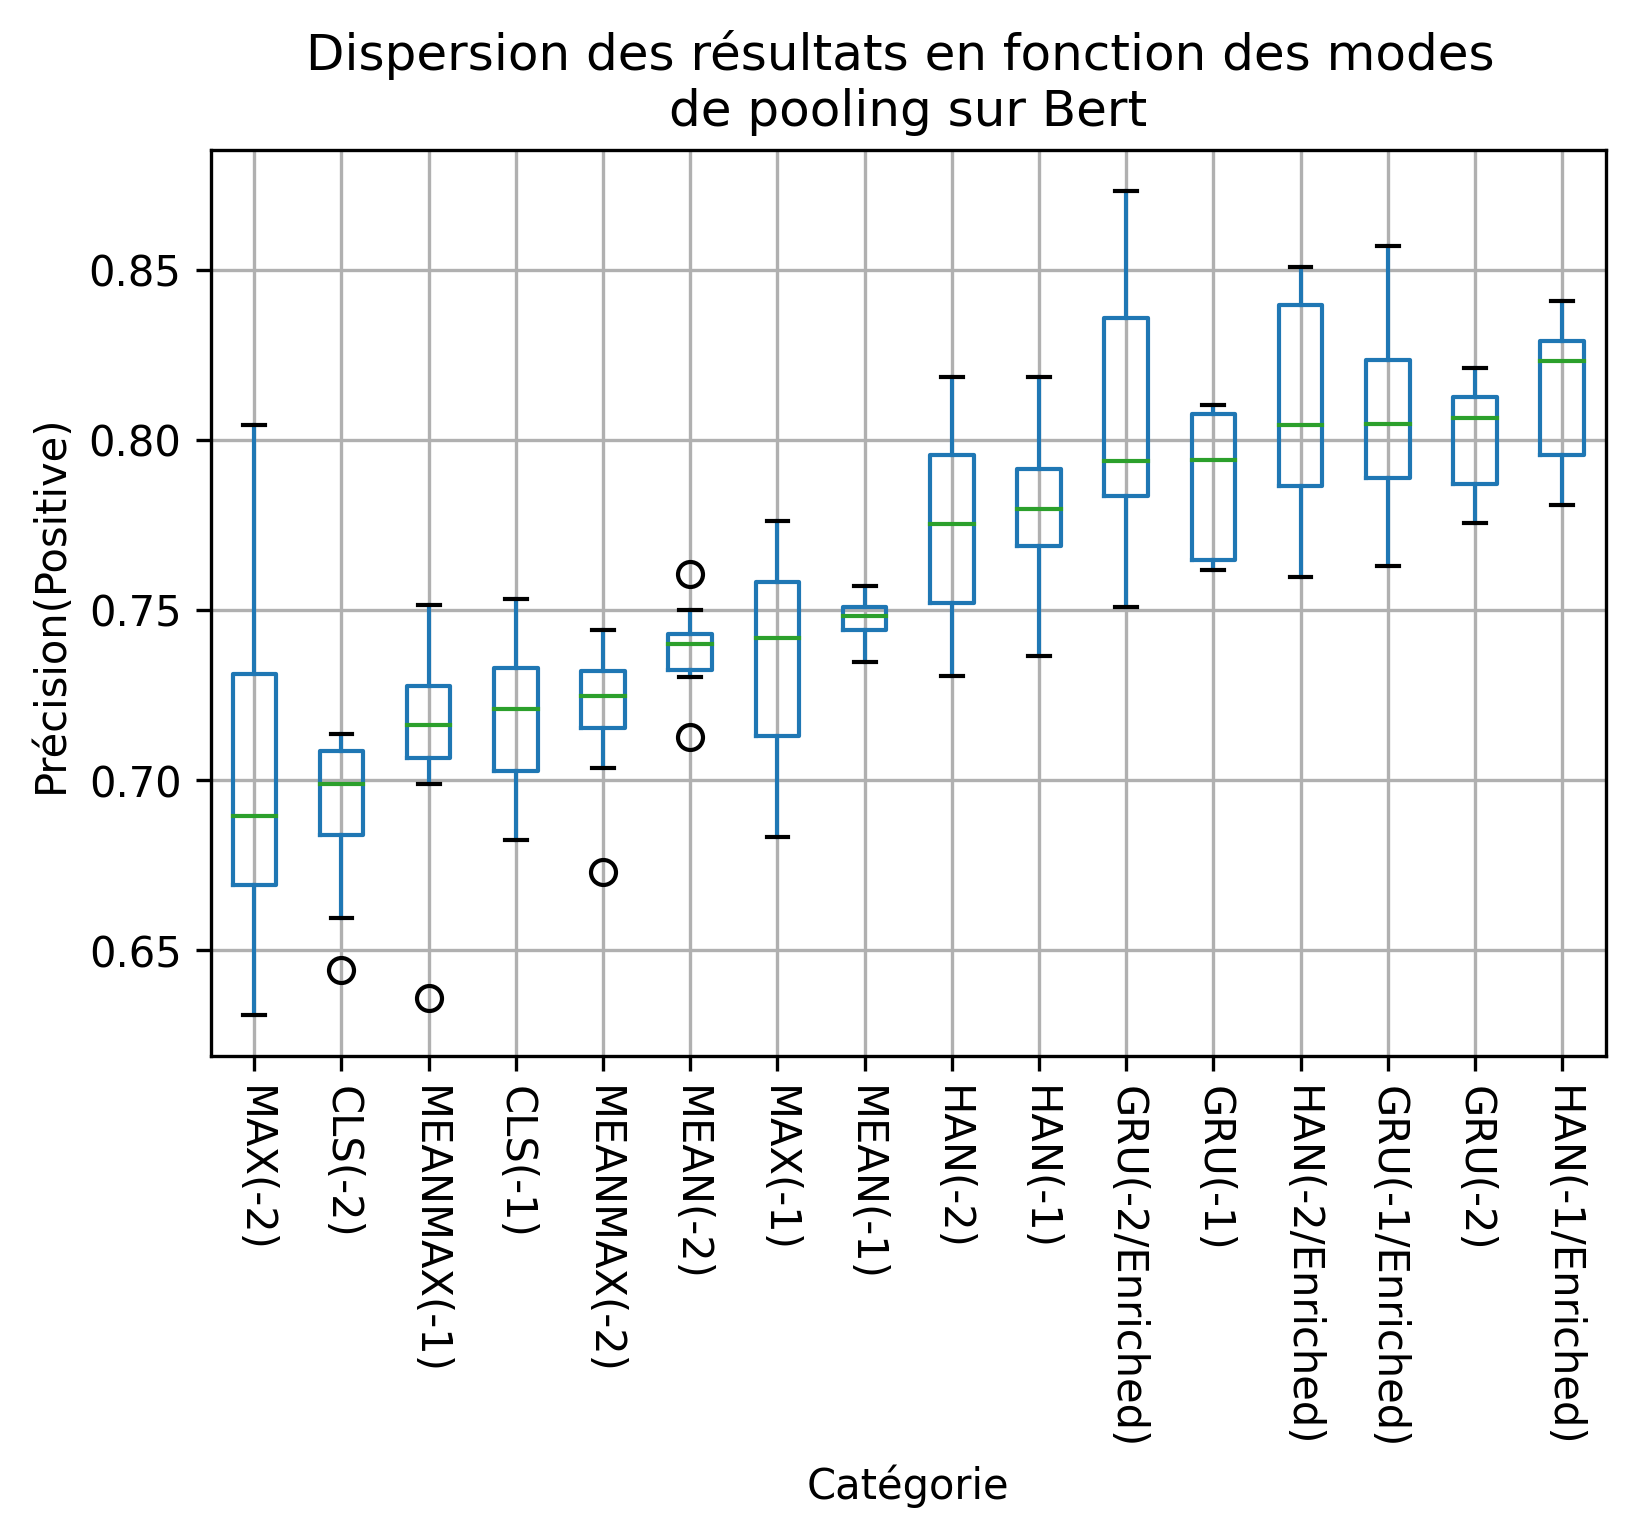

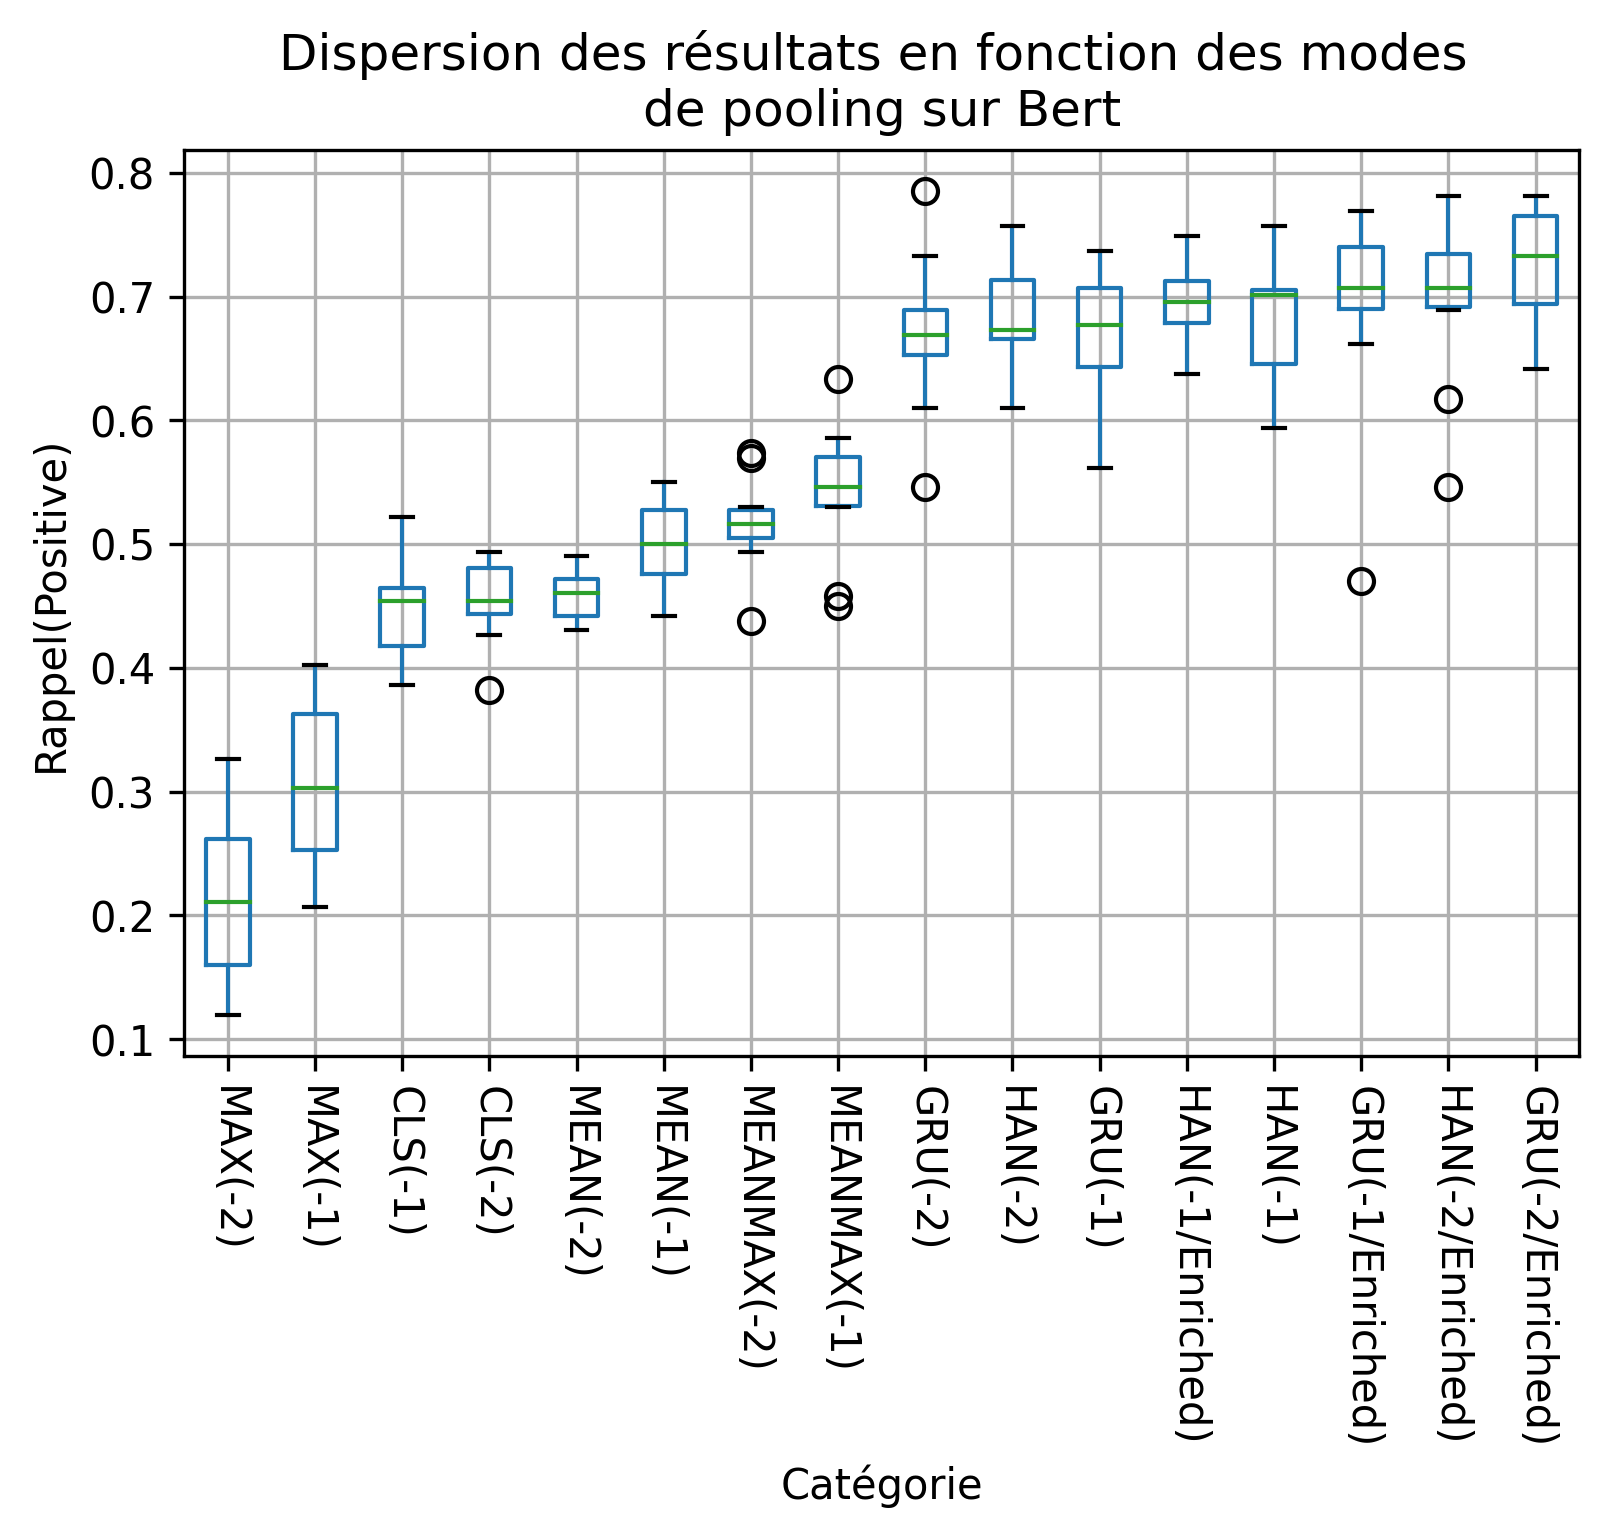

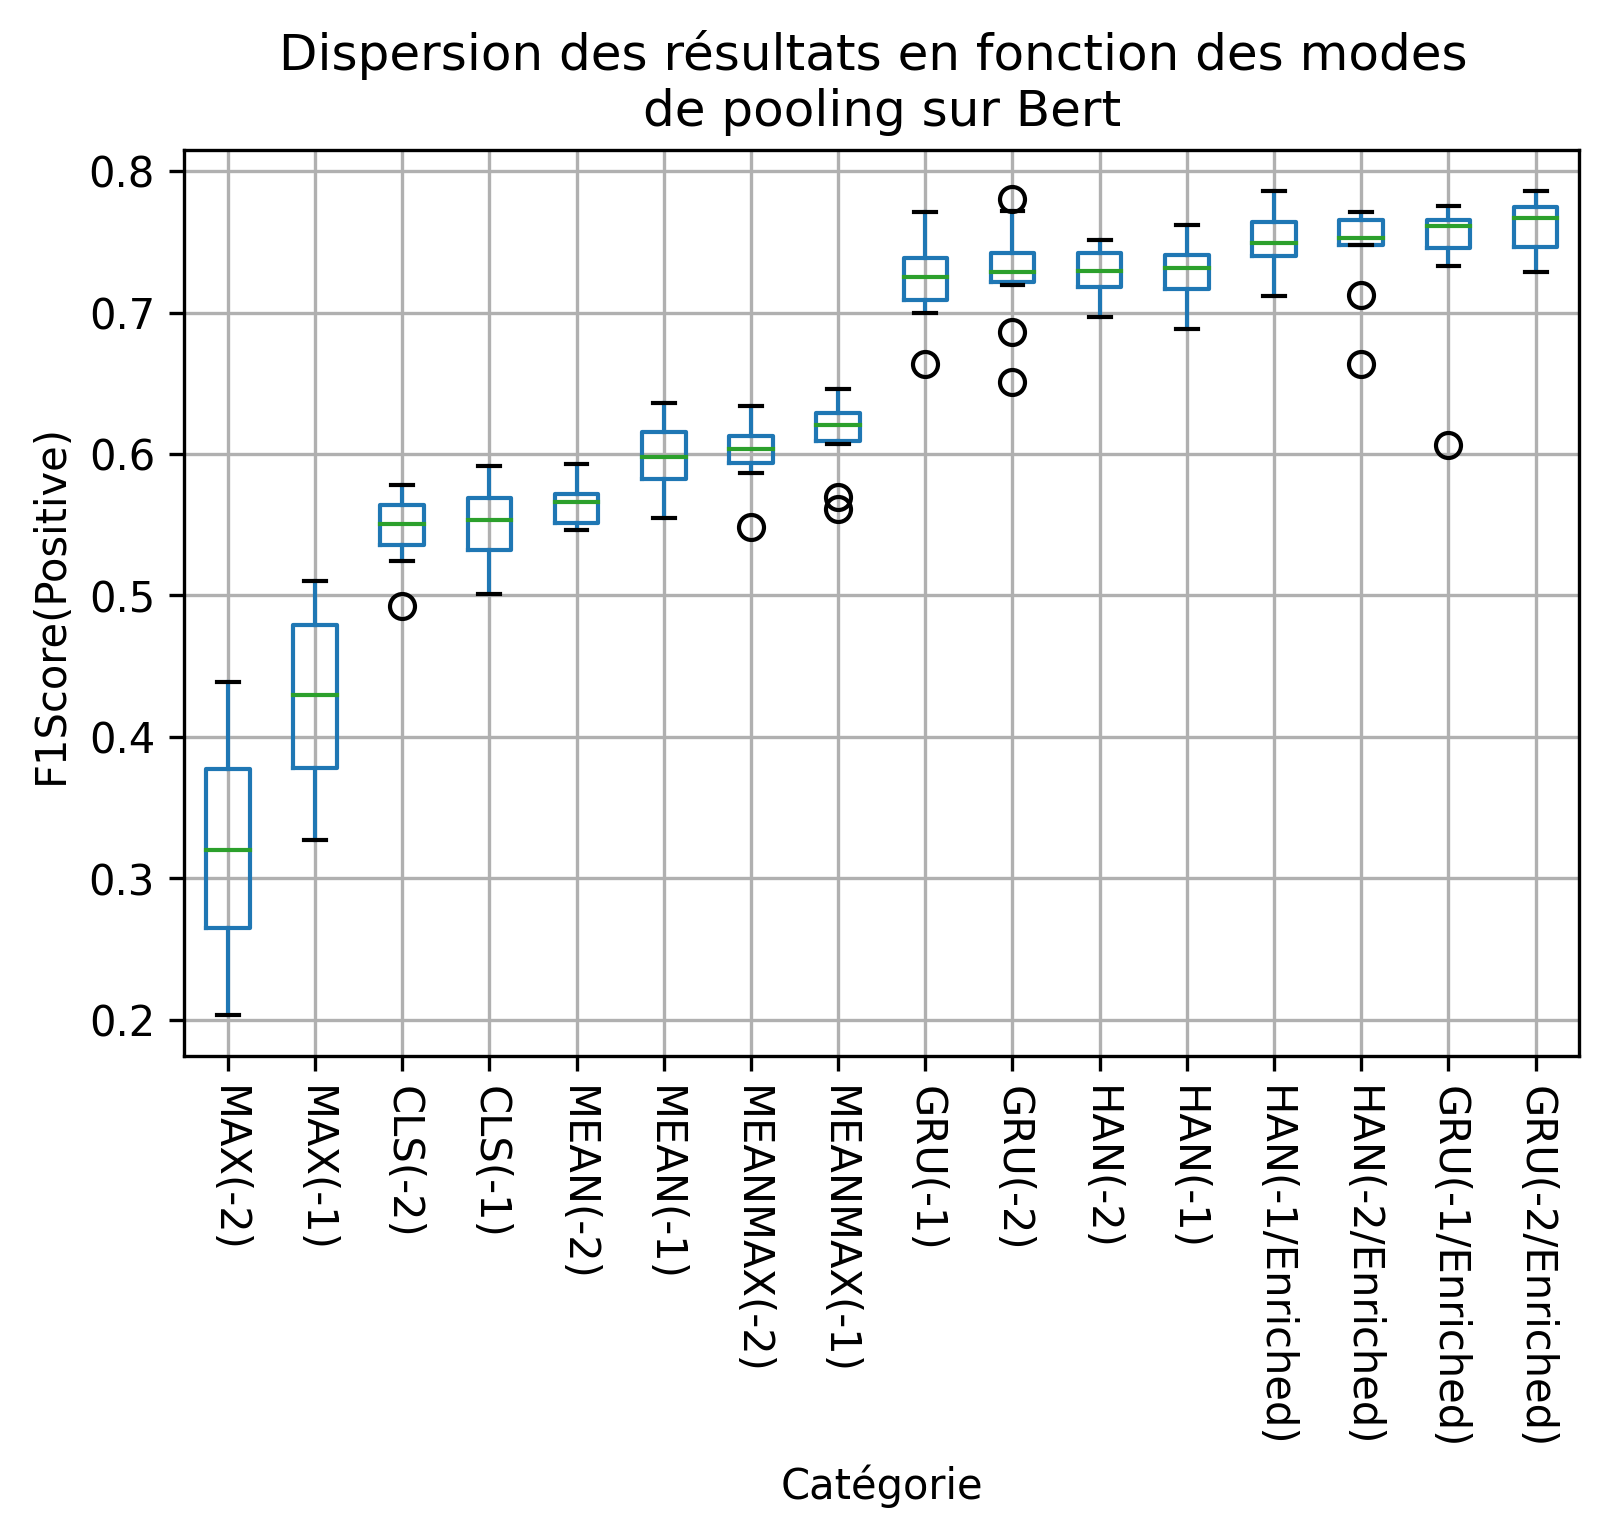

In [5]:

#print(df)
#df[df["bert_trainable"] != "True"][["precision-positive", "label"]].boxplot(by="label", order=[1])

import matplotlib.pyplot as plt

def boxplot_sorted(df, by, column, rot=0, ax=None):
    # use dict comprehension to create new dataframe from the iterable groupby object
    # each group name becomes a column in the new dataframe
    df2 = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})
    # find and sort the median values in this new dataframe
    meds = df2.median().sort_values()
    # use the columns in the dataframe, ordered sorted by median value
    # return axes so changes can be made outside the function
    return df2[meds.index].boxplot(rot=rot, return_type="axes", ax=axes)

fig = plt.figure(dpi=300)
axes = fig.gca()
axes = boxplot_sorted(df=df[df["bert_trainable"] != "True"], by="label", column="precision-positive", ax=axes)
plt.xlabel('Catégorie')
plt.ylabel('Précision(Positive)')
plt.title('Dispersion des résultats en fonction des modes \nde pooling sur Bert')
plt.suptitle('')
plt.xticks(rotation=-90) 
plt.show()

fig = plt.figure(dpi=300)
axes = fig.gca()
axes = boxplot_sorted(df=df[df["bert_trainable"] != "True"], by="label", column="recall-positive", ax=axes)
plt.xlabel('Catégorie')
plt.ylabel('Rappel(Positive)')
plt.title('Dispersion des résultats en fonction des modes \nde pooling sur Bert')
plt.suptitle('')
plt.xticks(rotation=-90) 
plt.show()

fig = plt.figure(dpi=300)
axes = fig.gca()
axes = boxplot_sorted(df=df[df["bert_trainable"] != "True"], by="label", column="fscore-positive", ax=axes)
plt.xlabel('Catégorie')
plt.ylabel('F1Score(Positive)')
plt.title('Dispersion des résultats en fonction des modes \nde pooling sur Bert')
plt.suptitle('')
plt.xticks(rotation=-90) 
plt.show()